In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
from shapely.geometry import Polygon
%matplotlib inline
import matplotlib.font_manager
import re

# 폰트 설정
mpl.rc('font', family='NanumGothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

In [7]:
df = pd.read_csv('./datos_project/19_21_pedstrians.csv', encoding='euc-kr')

In [8]:
df.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,6773133,2022032,1111017400,11110001,서울특별시 종로구1,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924,"{""type"":""Polygon"",""coordinates"":[[[127.0165618..."
1,6773478,2022032,1111018100,11110002,서울특별시 종로구2,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522,"{""type"":""Polygon"",""coordinates"":[[[126.9651519..."
2,6773488,2022032,1111016300,11110003,서울특별시 종로구3,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064,"{""type"":""Polygon"",""coordinates"":[[[127.0027584..."
3,6774060,2022032,1111016900,11110004,서울특별시 종로구4,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024,"{""type"":""Polygon"",""coordinates"":[[[127.0022057..."
4,6774068,2022032,1111017500,11110005,서울특별시 종로구5,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834,"{""type"":""Polygon"",""coordinates"":[[[127.0185943..."


In [9]:
# 시도시군구명, 지점명, 발생건수, 사상자수, 사망자수, 중상자수, 경상자수, 부상신고자수, 경도, 위도 컬럼만 선택
df1 = df[['시도시군구명', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]


In [10]:
df1.head()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시 종로구1,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924
1,서울특별시 종로구2,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522
2,서울특별시 종로구3,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064
3,서울특별시 종로구4,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024
4,서울특별시 종로구5,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834


In [11]:
# "서울특별시"를 포함하는 행만 선택
df2 = df1[df1['시도시군구명'].str.contains('서울특별시')]
df2.head()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시 종로구1,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924
1,서울특별시 종로구2,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522
2,서울특별시 종로구3,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064
3,서울특별시 종로구4,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024
4,서울특별시 종로구5,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시도시군구명  200 non-null    object 
 1   지점명     200 non-null    object 
 2   발생건수    200 non-null    int64  
 3   사상자수    200 non-null    int64  
 4   사망자수    200 non-null    int64  
 5   중상자수    200 non-null    int64  
 6   경상자수    200 non-null    int64  
 7   부상신고자수  200 non-null    int64  
 8   경도      200 non-null    float64
 9   위도      200 non-null    float64
dtypes: float64(2), int64(6), object(2)
memory usage: 17.2+ KB


In [14]:
df2.tail()

,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
195,서울특별시 강동구3,서울특별시 강동구 길동(천동초교입구교차로 부근),4,7,0,5,2,0,127.140159,37.541101
196,서울특별시 강동구4,서울특별시 강동구 천호동(천동초교앞교차로 부근),4,6,0,5,1,0,127.136989,37.541271
197,서울특별시 강동구5,서울특별시 강동구 천호동(천호동1632 부근),4,5,0,5,0,0,127.133162,37.536753
198,서울특별시 강동구6,서울특별시 강동구 천호동(천호초교입구교차로 부근),4,5,0,4,1,0,127.134694,37.547574
199,서울특별시 강동구7,서울특별시 강동구 암사동(성덕여중교 부근),4,5,0,4,0,1,127.140114,37.550475


In [15]:
# 시도, 시군구 컬럼 분할
df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
df2


C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_10552\1061151297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)
C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_10552\1061151297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['시도', '시군구']] = df2['시도시군구명'].str.split(' ', n=1, expand=True)


,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 종로구1,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924,서울특별시,종로구1
1,서울특별시 종로구2,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522,서울특별시,종로구2
2,서울특별시 종로구3,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064,서울특별시,종로구3
3,서울특별시 종로구4,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024,서울특별시,종로구4
4,서울특별시 종로구5,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834,서울특별시,종로구5
...,...,...,...,...,...,...,...,...,...,...,...,...
195,서울특별시 강동구3,서울특별시 강동구 길동(천동초교입구교차로 부근),4,7,0,5,2,0,127.140159,37.541101,서울특별시,강동구3
196,서울특별시 강동구4,서울특별시 강동구 천호동(천동초교앞교차로 부근),4,6,0,5,1,0,127.136989,37.541271,서울특별시,강동구4
197,서울특별시 강동구5,서울특별시 강동구 천호동(천호동1632 부근),4,5,0,5,0,0,127.133162,37.536753,서울특별시,강동구5
198,서울특별시 강동구6,서울특별시 강동구 천호동(천호초교입구교차로 부근),4,5,0,4,1,0,127.134694,37.547574,서울특별시,강동구6


In [20]:
# 시도시군구명 컬럼 제거
df2.drop('시도시군구명', axis=1, inplace=True)

C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_10552\4221106044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('시도시군구명', axis=1, inplace=True)


In [22]:
df2.head()

,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,시도,시군구
0,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924,서울특별시,종로구1
1,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522,서울특별시,종로구2
2,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064,서울특별시,종로구3
3,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024,서울특별시,종로구4
4,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834,서울특별시,종로구5


In [23]:
df2 = df2[['시도', '시군구', '지점명', '발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '경도', '위도']]


In [25]:
df2.head()

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,종로구1,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924
1,서울특별시,종로구2,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522
2,서울특별시,종로구3,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064
3,서울특별시,종로구4,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024
4,서울특별시,종로구5,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834


In [27]:
# 뒤에 숫자 제거
df2['시군구'] = df2['시군구'].apply(lambda x: re.sub(r'\d+', '', x))

In [29]:
df2.head()

,시도,시군구,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
0,서울특별시,종로구,서울특별시 종로구 창신동(동묘앞역사거리 부근),5,8,0,6,2,0,127.015664,37.572924
1,서울특별시,종로구,서울특별시 종로구 행촌동(사직터널남측 부근),4,7,1,3,2,1,126.964254,37.572522
2,서울특별시,종로구,서울특별시 종로구 종로5가(종로5가사거리 부근),4,6,1,3,1,1,127.001860,37.571064
3,서울특별시,종로구,서울특별시 종로구 혜화동(혜화동로터리 부근),4,6,0,4,1,1,127.001307,37.586024
4,서울특별시,종로구,서울특별시 종로구 숭인동(아람보습학원 부근),4,4,0,4,0,0,127.017696,37.573834


In [32]:
# 구별로 그룹화
df2.groupby('시군구')['발생건수'].agg('sum')

시군구
강남구     54
강동구     29
강북구     42
강서구     27
관악구     84
광진구     20
구로구     34
금천구     20
노원구     28
도봉구     25
동대문구    47
동작구     46
마포구     22
서대문구    29
서초구     16
성동구     14
성북구     45
송파구     57
양천구     22
영등포구    25
용산구     16
은평구     30
종로구     29
중구      63
중랑구     44
Name: 발생건수, dtype: int64

In [31]:
df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')
df3

C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_10552\2423950589.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3 = df2.groupby('시군구')['발생건수', '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')


,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
시군구,,,,,,
강남구,54,75,3,52,17,3
강동구,29,44,0,34,9,1
강북구,42,64,2,44,18,0
강서구,27,36,2,26,8,0
관악구,84,118,2,84,28,4
광진구,20,30,0,22,7,1
구로구,34,46,2,33,10,1
금천구,20,36,1,21,11,3
노원구,28,37,2,28,6,1


<Axes: xlabel='시군구'>

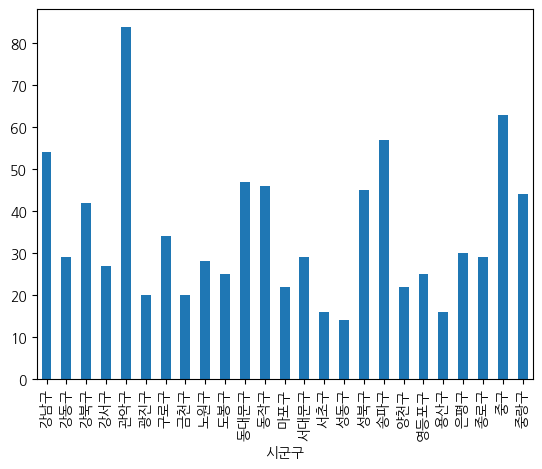

In [39]:
df3['발생건수'].plot.bar()

<Axes: xlabel='시군구'>

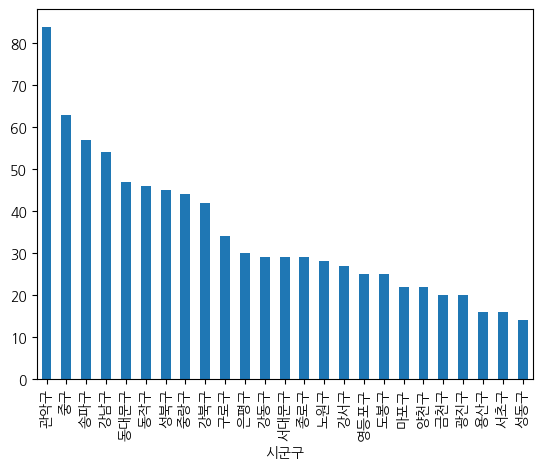

In [38]:
df3['발생건수'].sort_values(ascending=False).plot.bar()

C:\Users\Kipioneer\AppData\Local\Temp\ipykernel_10552\978336448.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pie = df2.groupby('시군구')['사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')


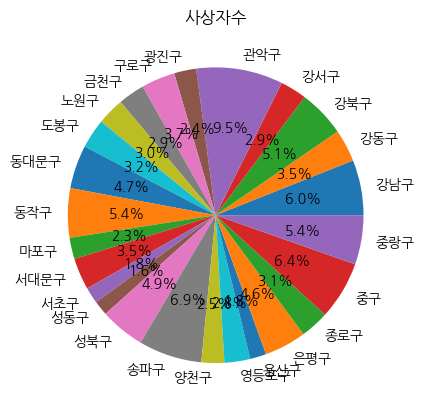

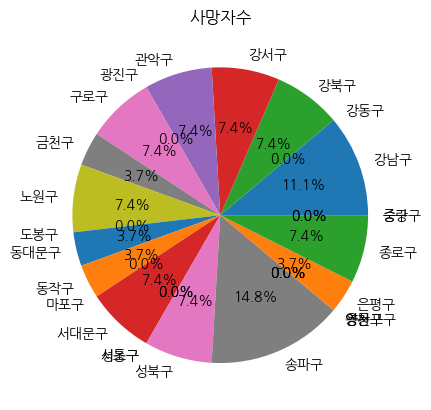

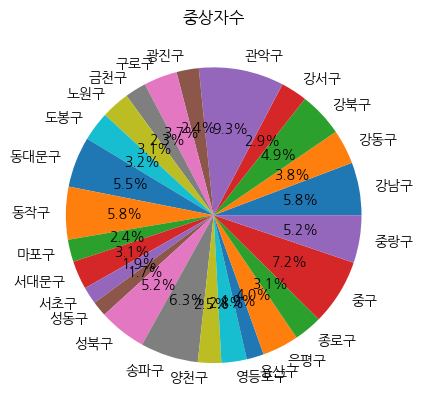

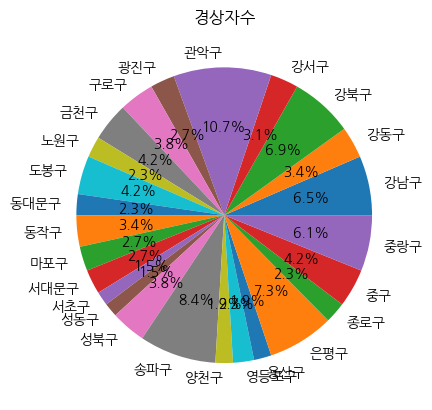

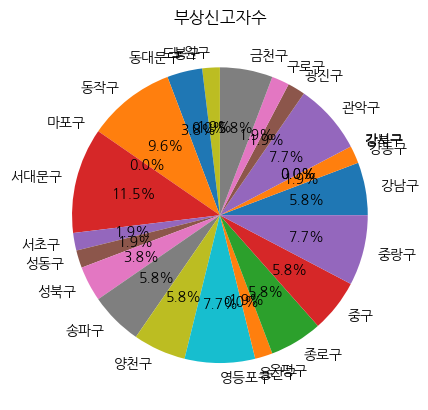

In [40]:
# 각 구별로 사고 피해 합산
df_pie = df2.groupby('시군구')['사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수'].agg('sum')

# 각 컬럼에 대한 파이차트 그리기
for col in df_pie.columns:
    plt.figure()
    plt.title(col)
    plt.pie(df_pie[col], labels=df_pie.index, autopct='%1.1f%%')
    plt.show()

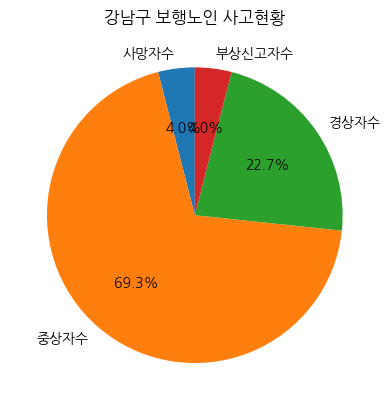

In [50]:
# 강남구 근데 구마다 해야하는건지 ...?? 
gangnam_data = df3.loc['강남구', ['사망자수', '중상자수', '경상자수', '부상신고자수']]

# 파이차트 그리기
fig, ax = plt.subplots()
ax.pie(gangnam_data, labels=gangnam_data.index, autopct='%1.1f%%', startangle=90)
ax.set_title('강남구 보행노인 사고현황')
plt.show()

In [57]:
center = [37.5502, 126.982]

# folium
map = folium.Map(location=center, zoom_start=11)

# 각 데이터 포인트마다 지도에 마커를 추가합니다
for idx, row in df2.iterrows():
    lon, lat = row['경도'], row['위도']
    # 마커
    marker = folium.Marker(location=[lat, lon])
    # 맵에 마커를 추가
    marker.add_to(map)

map

In [58]:
# 보행노인 사고 다발지역 위치를  Marker로 표시
for name, lat, lng in zip(df2.지점명, df2.위도, df2.경도):
    folium.Marker([lat, lng], popup=name).add_to(map)
map

In [ ]:
### 여기까지 했음 